Introduction: In this project I want to perform Retail Data Analysis based on given dataset by odin school for analysis.
This is based on Product and sales information and can be used to give visuals for distribution of sales among different cities in different months and sales change over time frame. It is also analyse the visuals for top most city by sales and the pair of products that are most sold together.
 
**Dataset Description:**
Instances: 3.73 Lakh

Features: 6 columns

Numerical: 4 columns

Categorical: 2 columns

**Attribute Information:**

•	**Order ID:** Order identification number for each product

•	**Product:** Product name

•	**Quantity Ordered:** Amount of items

•	**Price Each:** Price of each product per item in dollars

•	**Order Date:** Date of purchase

•	**Purchase Address:** Address of purchase order


In [1]:
import numpy as np # This library imported for working with linear algebra numpy functionalities used for EDA
import pandas as pd # This library imported for data processing, read CSV file I/O (e.g. pd.read_csv) and working with dataframes.
import matplotlib.pyplot as plt # This library imported for working visualization and plotting graphs
import missingno as msno #To working with missimg values and its pattern
import plotly.express as px # To working plotly figures and graphs
import seaborn as sns # This library imported for working visualization and plottong graphs


#  1.	Load the dataset into pandas and provide a summary of columns in the loaded dataset without any modification.

In [2]:
retaildf=pd.concat(pd.read_excel('F:/EDA/EDA_Proj/all_data_copy.xlsx', sheet_name=None), ignore_index=True)
#retaildf=pd.read_csv("/content/all_data_copy.csv")

**Look into the Data**

Lets see how the dataset look and get some basic information. i.e

Data types

No of Data (rows and column)

Null Data

few rows to understand the data





In [3]:
retailorig=retaildf.copy(deep=True) # To copy Original dataset before applying analysis prerequiestics
retaildf.shape #To check shape and no of observation which matched to described in recived dataset

(373700, 6)

In [4]:
print(retaildf.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB
None


1.The info() function is used to print a concise summary of a retaildf DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. in diabets total 6 columns and 373700 observations are available. Datatypes of all columns displayed as Object.2. Dataset not include any null values. Memory usage typicalyy 17.1+ mb.

After checking record in head() and tail() methods its need to change name and datatypes of columns.

In [5]:
retaildf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [6]:
retaildf.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373695,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"
373699,259357,USB-C Charging Cable,1,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016"


**Observations:**

Features: 6 columns

Numerical: 3 columns[Order_ID,QuantityOrdered,PriceEach)

-needs to be rename as order_id,quantity_ordered and unit_price respectively. The order_id is seems to be qualitative nominal

Date time:Order Date	needs to be rename as order_date

Categorical: 2 columns[Product,Purchase Address] needs to be rename as product_name,purchase_address respectively

#2.	Prepare the data frame for further analysis. Clean it, mould it in any manner you see fit.

In [7]:
retaildf.columns #To displays column headers of dataset

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [8]:
# Renaming column
retaildf.rename(columns = {'Order ID':'order_id','Product':'product_name','Quantity Ordered':'quantity_ordered','Price Each':'unit_price','Order Date':'order_date','Purchase Address':'purhase_address'}, inplace = True)
   
# After renaming the columns
print("\nAfter modifying first column:\n",retaildf.columns)


After modifying first column:
 Index(['order_id', 'product_name', 'quantity_ordered', 'unit_price',
       'order_date', 'purhase_address'],
      dtype='object')


In [9]:
#To check unique Values
retaildf['unit_price'].unique()

array([700, 14.95, 11.99, 149.99, 2.99, 389.99, 11.95, 99.99, 150, 1700,
       300, 400, 3.84, 600, 109.99, 379.99, 999.99, nan, 'Price Each'],
      dtype=object)

In [10]:
retaildf['order_date'].unique()

array([datetime.datetime(2019, 1, 22, 21, 25),
       datetime.datetime(2019, 1, 28, 14, 15),
       datetime.datetime(2019, 1, 17, 13, 33), ...,
       datetime.datetime(2019, 12, 1, 12, 1),
       datetime.datetime(2019, 12, 9, 6, 43),
       datetime.datetime(2019, 12, 3, 10, 39)], dtype=object)

In [11]:
retaildf['product_name'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine', nan, 'Product'], dtype=object)

In [12]:
#To check missing values
retaildf.isnull().sum()

order_id            1090
product_name        1090
quantity_ordered    1090
unit_price          1090
order_date          1090
purhase_address     1090
dtype: int64

<AxesSubplot:>

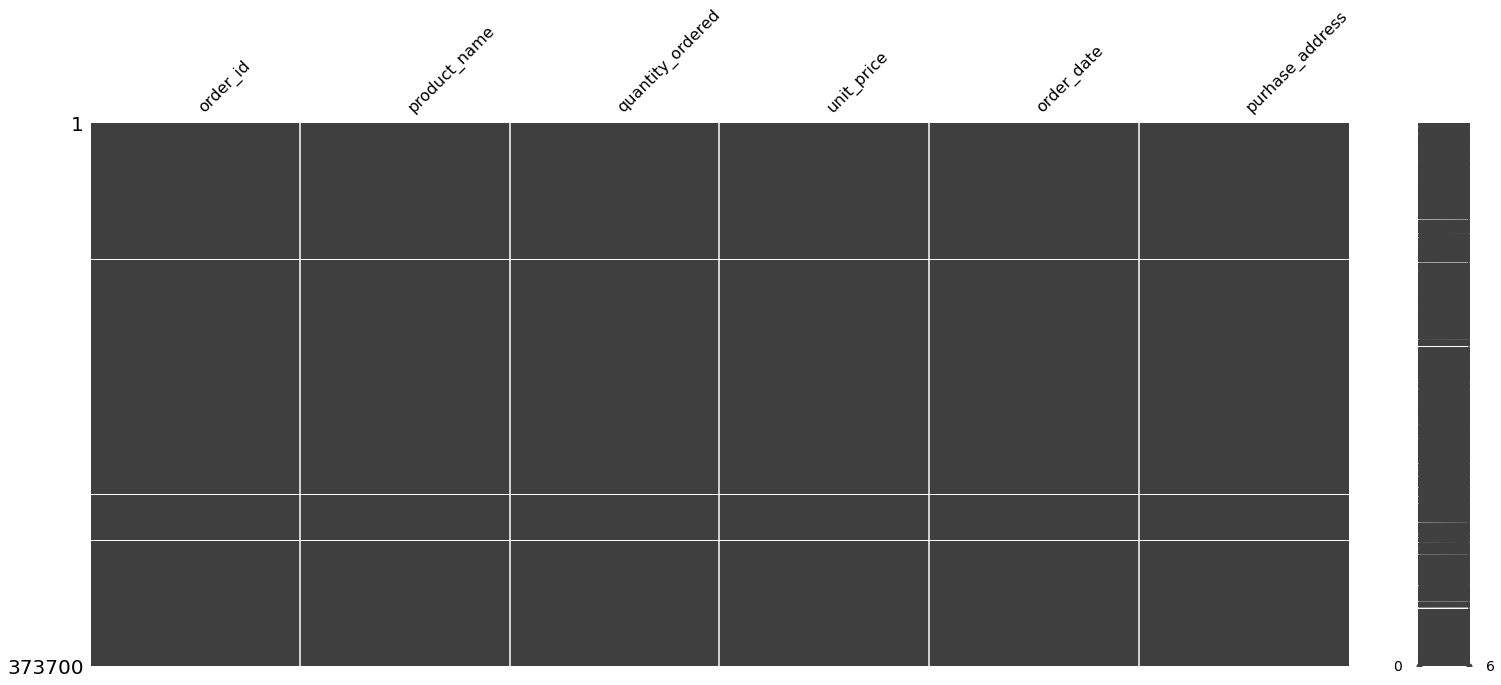

In [14]:
# To check pattern of missing values
msno.matrix(retaildf)

**Observations:**

After observing missing values using looking into dataset,applying unique() and missingno matrix many values rows in dataset are nan and repeated some duplicate rows. so i need to apply drop_duplicates() and remove nan values.

In [15]:
retaildf.drop_duplicates(keep='first', inplace = True)

In [16]:
#To check missing values
retaildf.isnull().sum()

order_id            1
product_name        1
quantity_ordered    1
unit_price          1
order_date          1
purhase_address     1
dtype: int64

In [27]:
retaildf['quantity_ordered'].unique()

array([1, 2, 3, 5, 4, 7, 'Quantity Ordered', 6, 9, 8], dtype=object)

In [18]:
# Drow rows with nan
retail=retaildf.dropna() 

In [19]:
retail['quantity_ordered'].unique()

array([1, 2, 3, 5, 4, 7, 'Quantity Ordered', 6, 9, 8], dtype=object)

In [28]:
retaildf.drop(retaildf[retaildf['quantity_ordered'] =='Quantity Ordered'].index, inplace = True)

In [29]:
#Rechecking Shape after data cleaning 
retail.shape

(185686, 6)

In [30]:
retaildf.isnull().sum()

order_id            0
product_name        0
quantity_ordered    0
unit_price          0
order_date          0
purhase_address     0
dtype: int64

In [31]:
retaildf=retail

In [32]:
retaildf['order_id'] = retaildf['order_id'].astype('category')
retaildf['product_name'] = retaildf['product_name'].astype('category')

retaildf['quantity_ordered'] = retaildf['quantity_ordered'].astype(int)
retaildf['unit_price'] = retaildf['unit_price'].astype(float)


In [33]:
#To check missing values
retaildf.isnull().sum()

order_id            0
product_name        0
quantity_ordered    0
unit_price          0
order_date          0
purhase_address     0
dtype: int64

In [34]:
retaildf.shape

(185686, 6)

In [35]:
#It used to describe both numerical and categorical columns. 

retaildf.describe(include='all')

,order_id,product_name,quantity_ordered,unit_price,order_date,purhase_address
count,185686.0,185686,185686.000000,185686.000000,185686,185686
unique,178437.0,19,NaN,NaN,142395,140787
top,160873.0,USB-C Charging Cable,NaN,NaN,2019-12-15 20:16:00,"193 Forest St, San Francisco, CA 94016"
freq,5.0,21859,NaN,NaN,8,9
mean,NaN,NaN,1.124544,184.519255,NaN,NaN
std,NaN,NaN,0.443069,332.843838,NaN,NaN
min,NaN,NaN,1.000000,2.990000,NaN,NaN
25%,NaN,NaN,1.000000,11.950000,NaN,NaN
50%,NaN,NaN,1.000000,14.950000,NaN,NaN
75%,NaN,NaN,1.000000,150.000000,NaN,NaN


**#Observations**
## In order_id many ids seems to be have duplicate  but i keep for futute grouping of products group.quantity_ordered	and unit_price are numeric and have no null values. The other columns also show variation between total count and unique values. It may be because of repeated order of products ,date and addresses.

In [36]:
#Describe numerical columns
retaildf.describe()

,quantity_ordered,unit_price
count,185686.000000,185686.000000
mean,1.124544,184.519255
std,0.443069,332.843838
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


#Observations
In numerical column summary we can see that quantity_ordered and unit_price has equal count i.e.185686 observations. The summary of columns as followes-



```
quantity_ordered	             unit_price

count	  185686.000000	      185686.000000
mean      1.124544	            184.519255
std	      0.443069	            332.843838
min       1.000000	            2.990000
25%       1.000000	           11.950000
50%	      1.000000	           14.950000
75%	      1.000000	           150.000000
max       9.000000	           1700.000000

```



# What is the distribution of sales among different cities in different months?
# a.Which City had the highest sales overall?

In [37]:
#To retrive datetime parts like month,year and time
import datetime as dt
#retaildf['year'] = pd.DatetimeIndex(retaildf['order_date']]).year
retaildf['month'] = pd.DatetimeIndex(retaildf['order_date']).month
retaildf['time'] = pd.DatetimeIndex(retaildf['order_date']).time
retaildf['hours'] = pd.DatetimeIndex(retaildf['order_date']).hour
#converting month number into string

month_labels={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}


retaildf["month"]=retaildf["month"].apply(lambda x:month_labels[x])

retaildf['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [38]:
# To create new column based on quantity_ordered	and unit_price
retaildf["sales"]=retaildf["quantity_ordered"]*retaildf["unit_price"]

In [39]:
#to copy original Dataframe
citydf=retaildf
#To strip city name from address and add city column to citydf
list_city = []
for i in citydf['purhase_address']:
    list_city.append(i.split(",")[1])
citydf['city'] = list_city
retaildf['city']=citydf['city']
retaildf.head()


,order_id,product_name,quantity_ordered,unit_price,order_date,purhase_address,month,time,hours,sales,city
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Jan,21:25:00,21,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Jan,14:15:00,14,14.95,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Jan,13:33:00,13,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Jan,20:33:00,20,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Jan,11:59:00,11,11.99,Austin


In [40]:
# grouping Citiwise sales and converted to frame with descending order by sales(Max sales)
citydf=retaildf.groupby(["city"])['sales'].sum().sort_values(ascending=False)
citydf=citydf.to_frame()
citydf

,sales
city,
San Francisco,8.254744e+06
Los Angeles,5.448304e+06
New York City,4.661867e+06
Boston,3.658628e+06
Atlanta,2.794199e+06
Dallas,2.765374e+06
Seattle,2.745046e+06
Portland,2.319332e+06
Austin,1.818044e+06


In [41]:
city=["San Francisco","Los Angeles","New York City","Boston","Atlanta","Dallas","Seattle","Portland","Austin"]
citydf["city"]=city

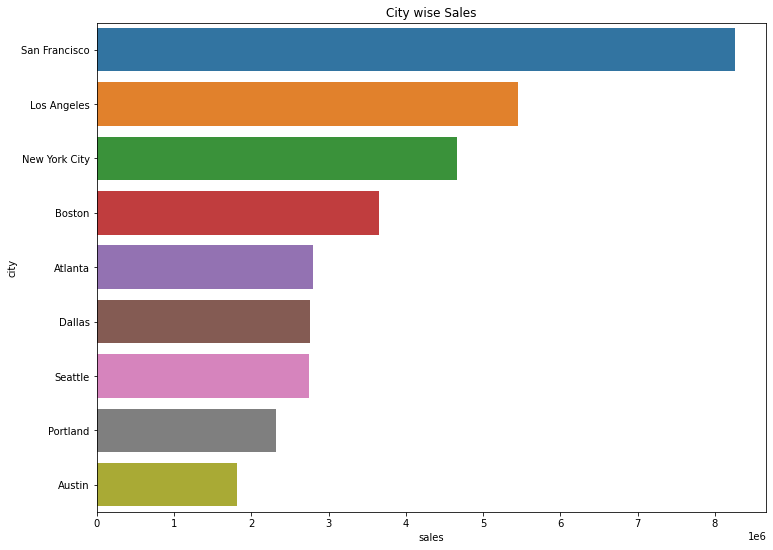

In [ ]:

fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x = 'sales',
            y = 'city',
            data = citydf)
plt.title("City wise Sales")
plt.show()

#Observations
Among the all cities in dataset San Francisco has highest sales.Los Angeles,New York City are the immediate followers as per higher sales.The Austin has less sales as copmare to other Cities.


# b.	Which Month had the highest amount of sales overall?

In [42]:
# grouping monthwise sales and converted to frame with descending order by sales(Max sales)
monthdf=retaildf.groupby(["month"])['sales'].sum().sort_values(ascending=False)
monthdf=monthdf.to_frame()
monthdf

,sales
month,
Dec,4.608296e+06
Oct,3.734778e+06
Apr,3.389218e+06
Nov,3.197875e+06
May,3.150616e+06
Mar,2.804973e+06
Jul,2.646461e+06
Jun,2.576280e+06
Aug,2.241083e+06


In [43]:
month=["Dec","Oct","Apr","Nov","May","Mar","Jul","Jun","Aug","Feb","Sep","Jan"]
monthdf["month"]=month

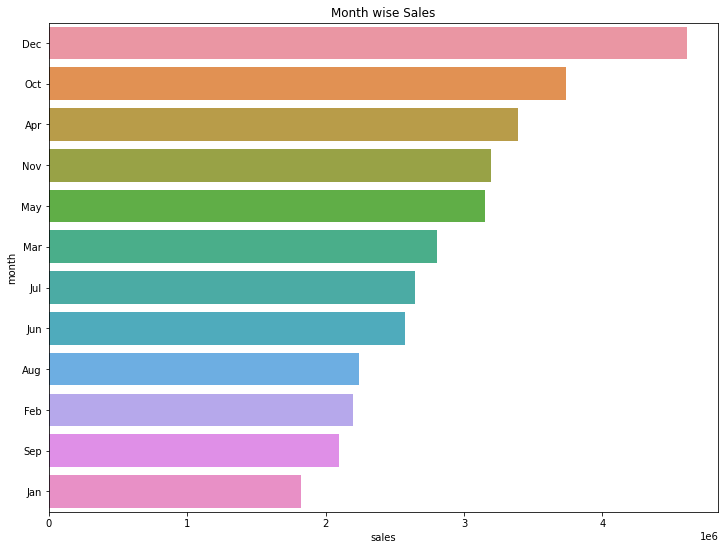

In [ ]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x = 'sales',
            y = 'month',
            data = monthdf)
plt.title("Month wise Sales")
plt.show()

#Observations
After analysing month wise sum of sales, the Dec has highest amount of sales.The Oct,April, Nov are nest higher followers for higher sales. The Jan has less sales as copmare to other months.

#c.	Most bought products per city.

In [44]:
# grouping Citiwise product Name and quantity converted to frame with descending order by sales(Max sales)
prodcitydf=retaildf.groupby(["city","product_name"])['quantity_ordered'].sum().sort_values(ascending=False).head(10)
prodcitydf=prodcitydf.to_frame()
prodcitydf

quantity_ordered
city           product_name                              
 San Francisco AAA Batteries (4-pack)                7404
               AA Batteries (4-pack)                 6549
               USB-C Charging Cable                  5883
               Lightning Charging Cable              5540
 Los Angeles   AAA Batteries (4-pack)                4958
 San Francisco Wired Headphones                      4956
 Los Angeles   AA Batteries (4-pack)                 4434
 New York City AAA Batteries (4-pack)                4119
 Los Angeles   USB-C Charging Cable                  3776
               Lightning Charging Cable              3765

In [51]:
city=["San Francisco","Los Angeles","San Francisco","Los Angeles","San Francisco","Los Angeles","New York City","Los Angeles","",""]
prodcitydf["city"]=city

In [52]:
quantityordered=[7404,6549,5883,5540,4958,4956,4434,4119,3776,3765]
prodcitydf["quantity_ordered"]=quantityordered

In [53]:
product_name=['AAA Batteries (4-pack)','AA Batteries (4-pack)','USB-C Charging Cable','Lightning Charging Cable','AAA Batteries (4-pack)',
              'Wired Headphones','AA Batteries (4-pack)','AAA Batteries (4-pack)','USB-C Charging Cable','Lightning Charging Cable']
prodcitydf["product_name"]=product_name

Text(0.5, 0, 'city')

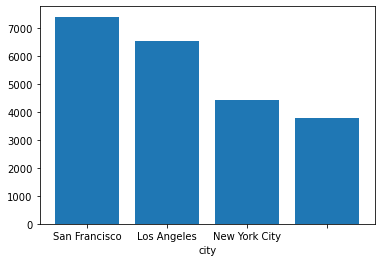

In [54]:
#need to change
plt.bar(prodcitydf['city'], prodcitydf['quantity_ordered'], align='center')


#plt.xticks(prodcitydf['city'])
plt.xlabel('city')




# Observations
with the reference of above graph San Fransisco placed higher order of quantities.While seeing intrest of buyers form stated city and based on my analysis, I suggest a city **San Fransisco**  for establishing a new branch for the retail store.

# 5.	Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) and answer the following for each city:

### a.	What products are mostly sold at different times of the day?


In [55]:
retaildf['hours'].unique()

array([21, 14, 13, 20, 11, 12, 10, 18, 19, 17,  8,  9,  0, 22, 23, 16,  7,
       15,  1,  2,  5,  6,  3,  4], dtype=int64)

In [56]:
#on basis of time hours i binned timeslot 

b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
retaildf['timeslot'] = pd.cut(retaildf['hours'], bins=b, labels=l, include_lowest=True)
retaildf['timeslot'].unique()

['Night', 'Noon', 'Eve', 'Morning', 'Early Morning', 'Late Night']
Categories (6, object): ['Late Night' < 'Early Morning' < 'Morning' < 'Noon' < 'Eve' < 'Night']

In [57]:
retaildf.head()
     

,order_id,product_name,quantity_ordered,unit_price,order_date,purhase_address,month,time,hours,sales,city,timeslot
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Jan,21:25:00,21,700.00,Boston,Night
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Jan,14:15:00,14,14.95,Portland,Noon
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Jan,13:33:00,13,23.98,San Francisco,Noon
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Jan,20:33:00,20,149.99,Los Angeles,Eve
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Jan,11:59:00,11,11.99,Austin,Morning


In [89]:
timeslot=retaildf.groupby(['hours','timeslot','product_name'])['quantity_ordered'].sum().sort_values(ascending=False).head(10)
timeslot=timeslot.to_frame()
timeslot

quantity_ordered
hours timeslot product_name                            
19    Eve      AAA Batteries (4-pack)              2296
11    Morning  AAA Batteries (4-pack)              2126
13    Noon     AAA Batteries (4-pack)              2083
12    Morning  AAA Batteries (4-pack)              2040
18    Eve      AAA Batteries (4-pack)              2021
20    Eve      AAA Batteries (4-pack)              1997
               AA Batteries (4-pack)               1950
12    Morning  AA Batteries (4-pack)               1914
13    Noon     AA Batteries (4-pack)               1854
18    Eve      AA Batteries (4-pack)               1852

In [95]:
product=['AAA Batteries (4-pack)','AAA Batteries (4-pack)','AAA Batteries (4-pack)','AAA Batteries (4-pack)','AAA Batteries (4-pack)','AAA Batteries (4-pack)','AA Batteries (4-pack)','AA Batteries (4-pack)','AA Batteries (4-pack)','AA Batteries (4-pack)']
timeslot['product_name']=product
h1=[19,11,13,12,18,20,12,13,18,18]
timeslot['hours']=h1

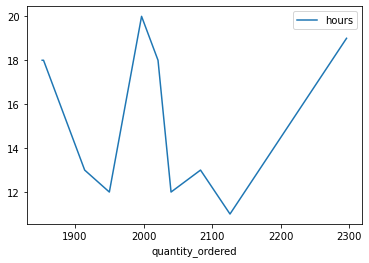

In [94]:
timeslot.plot(x="quantity_ordered", y="hours", kind="scatter")
plt.show()
plt.title("")

Text(0.5, 1.0, 'products sold at different time hours of the day')

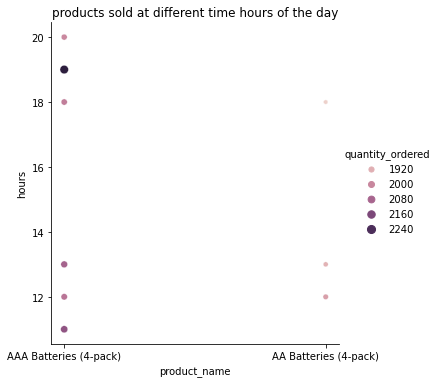

In [112]:
# Creation of Data
x1 =timeslot['product_name']

y1 = timeslot['hours']
y2 = timeslot['quantity_ordered']
  

sns.relplot(x=x1, y=y1, hue=y2,color='red', size=y2,data=timeslot)
plt.title("products sold at different time hours of the day")

# Observations


# b.	Which time of day has the most sales?

In [59]:
timeslot=retaildf.groupby(['timeslot'])['sales'].sum().sort_values(ascending=False).head()
timeslot=timeslot.to_frame()
timeslot

,sales
timeslot,
Eve,9.037683e+06
Morning,8.192752e+06
Noon,8.078030e+06
Night,4.824827e+06
Early Morning,2.615004e+06


In [66]:
timeslot1=["Eve","Morning","Noon","Night","Early Morning"]
timeslot["ts"]=timeslot1

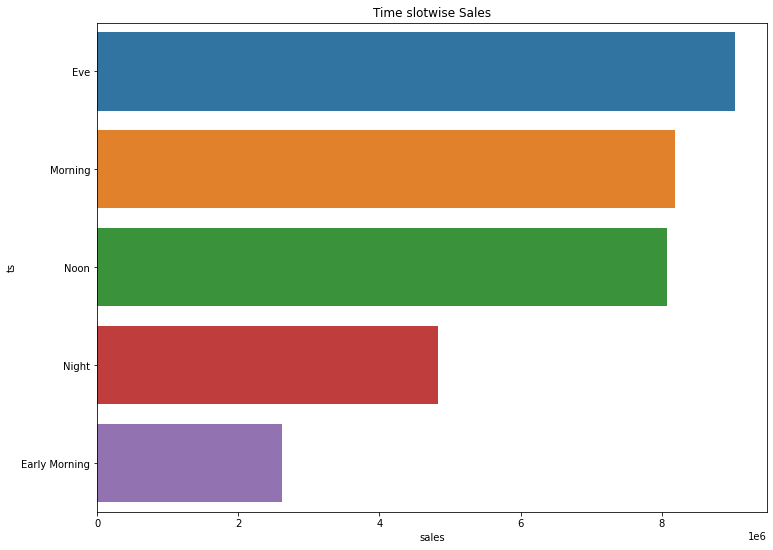

In [67]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(x = 'sales',
            y = 'ts',
            data = timeslot)
plt.title("Time slotwise Sales")
plt.show()

### Based on  analysis, i suggested the best working hours are evening hours and the best products for the retail stores in each city are Macbook Pro Laptop and iphone.

### 6.	Find out the pair of products that are most sold together. For example, generally, we would expect a person who buys an iPhone 11 to also buy the Apple Airpods together with it. Identify such pairs of products and suggest what promotional offers should the retail company come up with based on your outcome.

In [ ]:
prodgroup=retaildf[retaildf['order_id'].duplicated(keep=False)]#To seprate duplicated order id

In [60]:
#To create a group of sold products together i used orderid feature from dataset
prodgroup=retaildf[retaildf['order_id'].duplicated(keep=False)]#To seprate duplicated order id
#merging products with same order id
prodgroup['prod_group']=prodgroup.groupby('order_id')['product_name'].transform(lambda x:','.join(x))
#droping duplicate values 
prodgroup=prodgroup[['order_id','prod_group']].drop_duplicates()
prodgroup.head()

<ipython-input-60-f2a69e927fa1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prodgroup['prod_group']=prodgroup.groupby('order_id')['product_name'].transform(lambda x:','.join(x))


,order_id,prod_group
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [61]:
retaildf.columns

Index(['order_id', 'product_name', 'quantity_ordered', 'unit_price',
       'order_date', 'purhase_address', 'month', 'time', 'hours', 'sales',
       'city', 'timeslot'],
      dtype='object')

In [62]:
from itertools import combinations
from collections import Counter
count=Counter()
for row in prodgroup['prod_group']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))#Counting all 2 products group
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

## In above results we can clearly see that the most often products sold together are iPhone and Lightning Charging Cable with 1002 order transactions.

In [63]:
from itertools import combinations
from collections import Counter
count=Counter()
for row in prodgroup['prod_group']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,3)))#Counting all 2 products group
count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 86),
 (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62),
 (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47),
 (('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33),
 (('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27),
 (('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24),
 (('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'),
  16),
 (('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'),
  5)]

##  In above results We can see the most often sold products (3 products) together are Google Phone, USB-C Charging Cable, and Wired Headphones with 86 transactions.